# Introduction

In this lab report I examined a dataset containing names of children in the United States from 1880 - 2018. For this project, I was required to discover a trend in the dataset. The trend that I discovered was that as more names were accounted for, the ratio of male names to female names converged to about 1:1.7. I dissected the data to determine how the names were distributed and I searched for anomalies in the data. 

In [1]:
from glob import glob
files = sorted( glob('names/yob*.txt') )
files[:3]

['names/yob1880.txt', 'names/yob1881.txt', 'names/yob1882.txt']

In [3]:
import numpy as np
d = {}
firstyear = 1880
lastyear  = 2018
nyears = lastyear - firstyear + 1
print(nyears)
for file in files: #[:3]:
    year = int( file[-8:-4] )
    with open(file) as f:
        lines = f.read().split('\n') 
    lines = [line for line in lines if len(line)>2] # exclude blank lines
    for line in lines:
        name, gender, count = line.split(',') 
        #print(name,gender,count)
        if name not in d: 
            # create a new default entry in d for name
            d[name] = {'F': np.zeros(nyears,dtype=int)  , 
                       'M': np.zeros(nyears,dtype=int)  }
        d[name][gender][year-firstyear] = int( count ) # because count is a string
        #break

139


In [22]:
totals = {}
sums = {}

for key in d.keys():
    sums[key] = {'F': 0, 'M': 0}
    totals[key] = sum(d[key]['F']) + sum(d[key]['M'])
    sums[key]['F'] = sum(d[key]['F'])
    sums[key]['M'] = sum(d[key]['M'])

In [23]:
totals = sorted(totals, key=totals.get, reverse=True)
totals[:30]

['James',
 'John',
 'Robert',
 'Michael',
 'Mary',
 'William',
 'David',
 'Joseph',
 'Richard',
 'Charles',
 'Thomas',
 'Christopher',
 'Daniel',
 'Elizabeth',
 'Matthew',
 'Patricia',
 'George',
 'Jennifer',
 'Linda',
 'Anthony',
 'Barbara',
 'Donald',
 'Paul',
 'Mark',
 'Edward',
 'Andrew',
 'Steven',
 'Kenneth',
 'Margaret',
 'Joshua']

In [29]:
genders = {'F': [], 'M': []}
lengths = {'F': [], 'M': []}
ratio = []
i = 0
for item in totals:
    
    if i == 0:
        print('The population for boys:girls within the first one-thousand names')
    if i < 1000 and i%100 == 0 and i != 0:
        print('M ', len(genders['M']))
        print('F ', len(genders['F']), '  ratio: ', len(genders['F'])/len(genders['M']))
        
    if i == 1000:
        print('\nThe population for boys:girls the rest of the data')
    if i%7500 == 0 and i != 0:
        print('M ', len(genders['M']))
        print('F ', len(genders['F']), '  ratio: ', len(genders['F'])/len(genders['M']))
    if sums[item]['F'] > sums[item]['M']:
        genders['F'].append(item)
    else:
        genders['M'].append(item)
    lengths['F'].append(len(genders['F']))
    lengths['M'].append(len(genders['M']))
    ratio.append(len(genders['F'])/len(genders['M']))
    i += 1

The population for boys:girls within the first one-thousand names
M  54
F  46   ratio:  0.8518518518518519
M  93
F  107   ratio:  1.1505376344086022
M  140
F  160   ratio:  1.1428571428571428
M  189
F  211   ratio:  1.1164021164021165
M  231
F  269   ratio:  1.1645021645021645
M  276
F  324   ratio:  1.173913043478261
M  317
F  383   ratio:  1.2082018927444795
M  360
F  440   ratio:  1.2222222222222223
M  411
F  489   ratio:  1.1897810218978102

The population for boys:girls the rest of the data
M  3038
F  4462   ratio:  1.4687294272547728
M  5927
F  9073   ratio:  1.5307912940779485
M  8732
F  13768   ratio:  1.5767292716445258
M  11561
F  18439   ratio:  1.5949312343222906
M  14202
F  23298   ratio:  1.6404731727925643
M  16915
F  28085   ratio:  1.6603606266627253
M  19586
F  32914   ratio:  1.6804860614724804
M  22294
F  37706   ratio:  1.6913070781376156
M  25082
F  42418   ratio:  1.6911729527150945
M  27835
F  47165   ratio:  1.6944494341656189
M  30460
F  52040   ratio:  1.7084

The trend that I notice is that the gap between the amount of female names compared to male names grows along with the total amount of names. The proportionality converges to approximately 1:1.7, male:female. However in the most common names, it seems to be that the difference in the ratio of names is smaller and that the names in the male population have become much more saturated meaning that there are more common male names than female names. For instance, a group study is more likely to have more males sharing a name than females. As a matter of fact, 12 of the 13 most popular names happen to be masculine names.

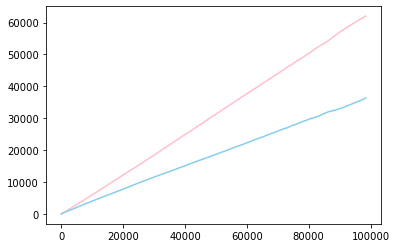

In [12]:
import matplotlib.pyplot as plt
lm = np.array(lengths['M'])
lf = np.array(lengths['F'])
plt.plot(range(len(lf)), lf, color='pink')
plt.plot(range(len(lm)), lm, color='skyblue')

Taking rise over run, we can see that the slope of the number of male names is 35908/100000 = .35908. This shows us that the commonality of male names can be expressed as 
                    <br><center>Y = .35908x + b, where b = 0. 

We can also fit the commonality of female names to a line. The slope is 61592/100000 = .61592 which can be expressed as
                    <br><center> Y = .61592x + b, where b = 0.

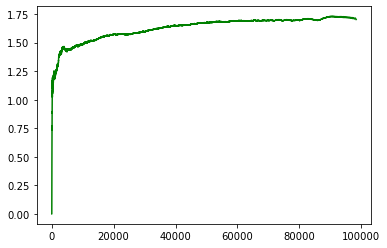

In [30]:
plt.plot(range(len(ratio)), ratio, color='green')